[Link to this document's Jupyter Notebook](./06h-HW1_Wave_Equation.ipynb)

# Homework 1: 1D Wave Equation

In this homework we will solve the wave equation in 1-D through a finite difference approach using Euler's method. The purpose of the assignment is to allow students to compare and benchmark language choice and its impact on time to science using an easy to describe and read, mostly memory coherent application.

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Implement a 1D wave equation using the finite difference method
* Conduct a timing study of your code



1. [Implement the 1D wave equation](#Implement-the-1D-wave-equation)
2. [Timeing / Scaling Study](#Timeing-Scaling-Study)
3. [Homework Report](#Homework-Report)
4. [Optional Bonus](#Optional-Bonus)
5. [Tar Zip your files](#Tar-Zip-your-files)




The 1D wave equation can be thought of as a wave propagating along a string.

<img alt="animated image of a 1 dimensional wave function as it propagates though time. It starts as a single peak and then moves down slowly into two peeks moving towards the ends. " src="https://i.stack.imgur.com/75vyK.gif" width=50%>


The wave equation is an  second-order linear partial differential equation for the description of waves as they occur in classical physics (for example: water waves, sound waves and seismic waves, light waves).  The basic algorithm splits the wave into a grid of points and calculates the point's position, velocity and acceleration.  The key incite to making the wave equations work that an individuals point will lead/follow the behavior of that points neighbors.  


In the 1D case we will model a line of points in the x-direction such that thy can only move in the y direction. The position for each point  $y$ can be calculated by the particle's previous position and the particle's velocity multiplied by the change in time:

$$y_{i+1} = y_i + \dot{y}_idt$$

Notation:
$$\frac{dy}{dt} = \dot{y} = v = \text{velocity of particle in y direction}$$

We calculation the velocity using the acceleration:

$$\dot{y}_{i+1} = \dot{y}_i + \ddot{y}_idt$$

Notation:
$$\frac{d^2y}{dt^2} = \frac{dv}{dt} = \ddot{y} = a = \text{acceleration of particle in y direction}$$


Given the above equations,  if we know the starting values $y_0$, $\dot{y}_0$, $\ddot{y}_0$ then the only unknown is the equation for how the acceleration changes.  

**Wave Equation:** We will estimate acceleration in time by using acceleration in space. Intuitively we can think about this as any point can estimate where it will be in the future by looking at it's neighbors. Mathematically we show this equation as follows:


$$\frac{d^2y}{dt^2} = \gamma\frac{d^2y}{dx^2}$$

We know the acceleration in space using the Euler's finite difference of the particle's position:

$$\frac{d^2y}{dx^2} \approx \frac{y[i+1]-2y[i]+y[i-1]}{dx^2}$$

To get the above equation we estimate the velocity to the Left and Right (Before and After) the point of interest using Finite Difference:

$$\dot{y}[i]_L = \frac{y[i]-y[i-1]}{dx}$$

$$\dot{y}[i]_R = \frac{y[i+1]-y[i]}{dx}$$

Second, using the Left and Right Velocity,  we use finite difference again to estimate the acceleration:

$$\ddot{y}[i] = \frac{\dot{y}[i]_R - \dot{y}[i]_L}{dx}$$

Putting it all together and simplifying we get the followign:

$$\ddot{y}[i] = \frac{y[i+1]-2y[i]+y[i-1]}{dx^2}$$

Given the above we can calculate a points position at time step $t+1$ by using it's position/velocity at timestep $t$ and it's neighbors position at time step $t-1$.

---
<a name=Implement-the-1D-wave-equation></a>
# 1. Implement the 1D wave equation



&#9989; **<font color=red>DO THIS:</font>** Write a 1D wave equation in your program language of choice using the following pseudocode as a guide. 

Pseudocode and settings for 1D Wave Equation

> ### Divide simulation into grid in the x direction
> 
> $xmin = 0; xmax=10; nx=512$
>
> $dx = \frac{xmax-xmin}{nx}$
>
> $x = \text{linspace}(xmin, xmax, nx)$  #Returns a row vector of nx evenly spaced points between xmin and xmax.
>
> ### Divide time into discrete units
>
> $tmin = 0; tmax=10; nt=1000000$
>
> $dt = \frac{tmax-tmin}{nt}$
>
> $times = \text{linespace}(tmin,tmax, nt)$ #Returns a row vector of nt evenly spaced points between tmin and tmax.
>
> ### Initialize starting position as a simple pulse
>
> $y_i = e^{-(x_i-5)^2}$ for all $i \in [0,nx)$
>
> ### Initialize velocity and acceleration to zero
>
> $\dot{y}_i = 0$ for all $i \in [0,nx)$
>
> $\ddot{y}_i = 0$ for all $i \in [0,nx)$
>
> $\gamma = 1$
>
> ### Run the simulation of t timesteps
> Loop over index $t$ in $times$:
>
>    > $\ddot{y}_0 = 0$ # Keep acceleration to zero on ends
>    >
>    > $\ddot{y}_{nx-1} = 0$ # Keep acceleration to zero on ends
>    >
>    > $\ddot{y}_i \approx \gamma \frac{y_{(i+1)} + y_{(i-1)}-2y_i}{dx^2}$ for all $i \in (0,nx-1)$ # Estimate acceleration using position
>    > 
>    > $y_i = y_i + \dot{y}_i dt$   for all $i \in [0,nx)$ # Update position
>    >
>    > $\dot{y}_{i} = \dot{y}_i+ \ddot{y}_idt$   for all $i \in [0,nx)$ # Update velocity


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [15]:
xmin = 0
xmax=10
nx=512
dx = (xmax-xmin)/nx
x = np.linspace(xmin, xmax, nx)

In [16]:
tmin = 0 
tmax=10
nt=1000000
dt = (tmax-tmin)/nt
times = np.linspace(tmin, tmax, nt)

In [17]:

gamma = 1


y = np.exp(-(x-5)**2)

print(y)

[1.38879439e-11 1.68834334e-11 2.05093051e-11 2.48947910e-11
 3.01948854e-11 3.65953284e-11 4.43185224e-11 5.36305508e-11
 6.48494958e-11 7.83552881e-11 9.46013604e-11 1.14128422e-10
 1.37580729e-10 1.65725279e-10 1.99474450e-10 2.39912653e-10
 2.88327716e-10 3.46247775e-10 4.15484621e-10 4.98184575e-10
 5.96888156e-10 7.14599993e-10 8.54870667e-10 1.02189244e-09
 1.22061110e-09 1.45685661e-09 1.73749539e-09 2.07060795e-09
 2.46569556e-09 2.93392084e-09 3.48838726e-09 4.14446382e-09
 4.92016170e-09 5.83657083e-09 6.91836556e-09 8.19438969e-09
 9.69833279e-09 1.14695113e-08 1.35537698e-08 1.60045202e-08
 1.88839383e-08 2.22643412e-08 2.62297703e-08 3.08778097e-08
 3.63216733e-08 4.26925966e-08 5.01425774e-08 5.88475110e-08
 6.90107752e-08 8.08673244e-08 9.46883621e-08 1.10786667e-07
 1.29522658e-07 1.51311300e-07 1.76629947e-07 2.06027255e-07
 2.40133292e-07 2.79671000e-07 3.25469171e-07 3.78477129e-07
 4.39781328e-07 5.10624081e-07 5.92424704e-07 6.86803326e-07
 7.95607706e-07 9.209433

In [18]:
import time
start = time.time()
#Simulation
#%%time

#def init():
   # line.set_data([], [])
    #return line,
def equ(times, nx, dt, gamma, x, y):
    y_v = np.zeros(nx-1)
    y_a = np.zeros(nx-1)
    #for t in times:
    for i in range(0, 511):
        if i == 0 or i == 511:
            y_a[i] = 0
            y_v[i] = y_v[i] + y_a[i]*dt
            y[i] = y[i] + y_v[i]*dt
        else:
            y_a[i] = gamma*((y[i+1] + y[i-1] - 2*y[i])/(dx)**2)
            y_v[i] = y_v[i] + y_a[i]*dt
            y[i] = y[i] + y_v[i]*dt
    return y
onedwave = equ(times, nx, dt, gamma, x, y)    
print(time.time() - start)

0.0011053085327148438


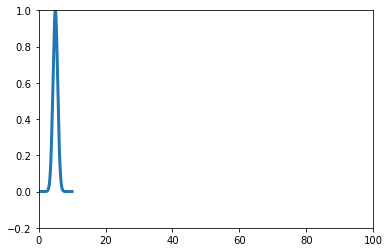

In [20]:
fig = plt.figure()

axis = plt.axes(xlim =(0, 100),
                ylim =(-0.2, 1.0))
line, = axis.plot(x, y, lw = 3)

def animate(i):
    line.set_ydata(equ(times, nx, dt, gamma, x, y))
    return line,
        
anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()



---
<a name=Timeing-Scaling-Study></a>
# 2. Timeing / Scaling Study



&#9989; **<font color=red>DO THIS:</font>** Conduct a timing study of your 1D wave equation.  Make sure you have run it enough times to get accurate results.  (You are encouraged to compare timing results if you have different versions of the code and/or if you run your code on different machines). 

The time scaling of the equation is used above using %%time. The average time was around 

The units for the time study is in seconds. Before when I would loop through t times, it would take minutes for the study to run. 

0.001192
0.001101
0.001087
0.001069
0.001105

In [19]:
a = [0.001192, 0.001101, 0.001087, 0.001069, 0.001105]
avg = np.mean(a)
print("The average run time in seconds is {}".format(avg))

The average run time in seconds is 0.0011108




---
<a name=Homework-Report></a>
# 3. Homework Report




Write a short (approx. 1-page) report for this homework.  Include the report and all of your code/instructions when you turn in the project (ex. Makefiles, library install instructions, etc). Make sure the report answers the following questions:

&#9989; **<font color=red>QUESTION:</font>**  On average how long did it take to execute the simulation above?

&#9989; **<font color=red>QUESTION:</font>** What programming language/version did you use to implement your 1D wave equation?

&#9989; **<font color=red>QUESTION:</font>** What instructions are needed for the instructor to reproduce your results? i.e. what commands are needed to compile your code?  What libraries (if any) Libraries are needed?  Do not assume that the instructor is familiar with your language. Make sure instructions are complete. Write them as if you were giving them to another student in this course or maybe CMSE202. 

&#9989; **<font color=red>QUESTION:</font>**  Describe the computer which you conducted the timing study (CPU speed, RAM, Operating System, software version, Cores used, etc.).

&#9989; **<font color=red>QUESTION:</font>**  Describe ways you could make your program go faster. 


---
<a name=Optional-Bonus></a>
# 4. Optional Bonus



Using your code, generate a visualization of the simulation similar to the animated gif at the top of this notebook. Include this visualization as part of your report.



---
<a name=Tar-Zip-your-files></a>
# 5. Tarzip your files



Create a folder based on your MSU netID and the homework code (For example, mine would be called colbrydi_HW1).  Place all of your source code files in the directory.  Make sure you include instructions for the instructors to use the code.  Do not include compiled code or libraries that can be installed by the instructor.  

We are going to use a program call ```tar``` which is used to "Archive" files. Basically ```tar``` will take a group of files and combine them into one file.  The command can also be used to ```zip``` or compress the result into a single, compact file that makes it easy to share.  We often call these files a tarzip.  To tarzip a folder you need to run the following command in the directory that contains your folder:

```bash
tar -czvf NAME.tgz FOLDER 
```

The options are as follows:

- ```c``` - compress the files into one file
- ```z``` - zip up the compressed file
- ```v``` - verbose mode (show us what the program is doing)
- ```f NAME.tgz``` - file NAME we want to use
- ```FOLDER``` - The folder with all of our files.

For my folder (colbrydi_HW1) the command would look like the following. 

```bash
tar -czvf colbrydi_HW1.tgz colbrydi_HW1
```

If you are running in Windows you may or may not have ```tar``` installed.  I recommend that you either install tar or upload your files to jupyterhub or the HPCC and tar the files there. 

To test if the ```tar``` file works, may a copy of the file in a temporary directory and run the following command to "untar" the file:

```bash
tar -xzvf NAME.tgz 
```
The options are as follows:

- ```x``` - xtract the file into it's original files
- ```z``` - unzip up the compressed file
- ```v``` - verbose mode (show us what the program is doing)
- ```f NAME.tgz``` - file NAME we want to use

If everything works, you should see a folder with all of our files.  For my folder (colbrydi_HW1) the command would look like the following:

```bash
tar -xzvf colbrydi_HW1.tgz 
```


-----
### Congratulations, you are done!

Submit your tgz file to the course Desire2Learn page in the HW1 assignment.  

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----